In [1]:
import pandas as pd

In [16]:
from ackeras import *

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
raw_data = pd.read_csv('data/random_data_places.csv').set_index('Row ID').drop('Order ID', axis = 1)

In [6]:
raw_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,City,Region,Area,Latitude,Longitude
Row ID,,,,,,,,,,,,,,,,,,,
1,2017-07-18,2017-08-05,Second Class,CG-12520,Consumer,Italy,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Milan,Lombardia,North,45.466797,9.190498
2,2017-06-26,2017-07-10,Second Class,CG-12520,Consumer,Italy,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Naples,Campania,South,40.835934,14.248783
3,2016-12-26,2017-01-13,Second Class,DV-13045,Corporate,France,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Toulouse,Haute-Garrone,Occitanie,43.604462,1.444247
4,2017-10-30,2017-11-14,Standard Class,SO-20335,Consumer,France,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Marseille,Bouches-du-Rhone,Provence-Alpes-Cote-d'Azur,43.296174,5.369953
5,2016-11-15,2016-11-21,Standard Class,SO-20335,Consumer,Italy,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Naples,Campania,South,40.835934,14.248783


#### First we start with the data preprocessing

The parameters to pass the data cleaner are the same as the Pipeline, i.e.:
features 

* categorical_features::list -> which columns to treat as categorical;
* timecolumn::string -> which column to treat as time index;
* drop_rest::boolean -> whether to drop the column not treated here (suggested and default),
* extreme_drop::string -> if the system fails you intervene

In [11]:
preprocessor = ackeras.data_cleaning.AccuratPreprocess(raw_data)

In [12]:
parameters = {
    'categorical_features': ['Ship Mode', 'Country', 'Category'],
    'timecolumn': 'Order Date',
    'drop_rest': True,
    'extreme_drop': []
}

In [13]:
data = preprocessor.fit_transform(**parameters)

Got rid of the NaN
Using label encoder for Ship Mode
Using one hot encoder for Country
Using label encoder for Category


/anaconda3/lib/python3.6/site-packages/ackeras/data_cleaning.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cat_data[col] = label_data


In [14]:
cat_f = ['Ship Mode', 'Category', 'Country, France']

#### Dimensionality reduction

The ackeras.dim_red is a module that I highly suggest **not** to use. 

If you pass labels the Umap takes that into account.

In [18]:
reductor = ackeras.dim_red.RedDimensionality(data, cat_f)
reductor.pca_data = reductor.pca_data.dropna(axis = 0) 

In [19]:
umap_data = reductor.umap()

In [20]:
umap_data.shape

(9994, 2)

In [21]:
def plot_emb(data, labels = None):
    plt.figure(figsize=(18,12))

    if data.shape[1] == 2:
        plt.xlabel('First dimension')
        plt.ylabel('Second dimension')
        c = labels if labels is not None else 'blue'
        plt.scatter(data[:,0], data[:,1], s = 5, c = c)
        plt.show()
    
    elif data.shape[1] == 1:
        sns.distplot(data)
        plt.show()
    

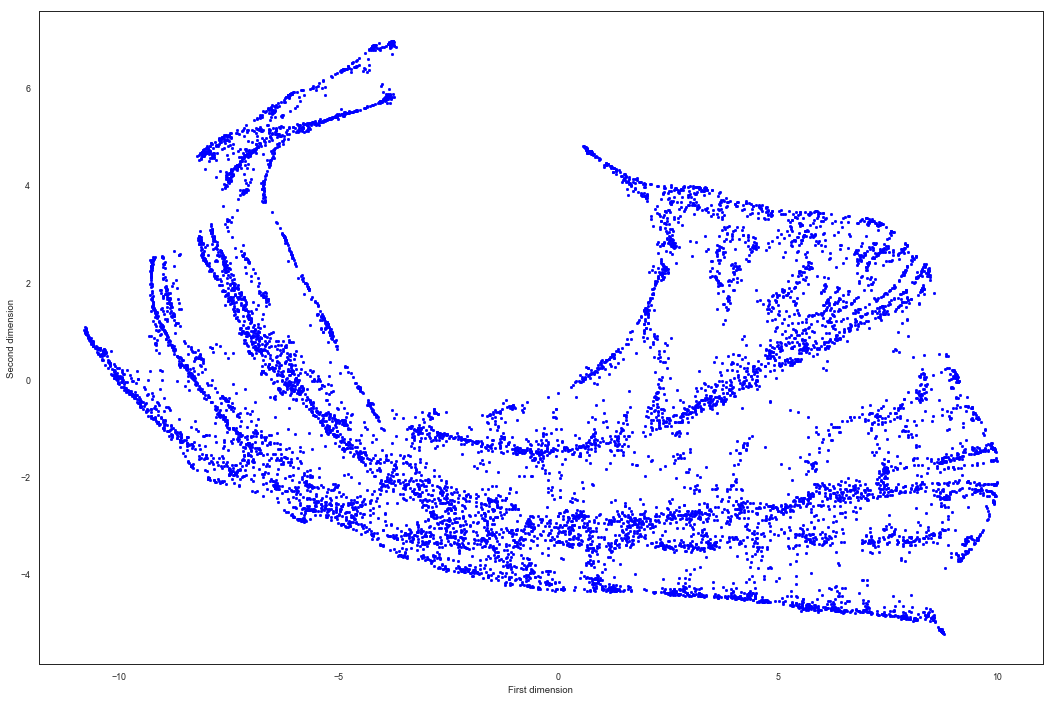

In [22]:
plot_emb(umap_data)

In [23]:
pca_data = reductor.pca()

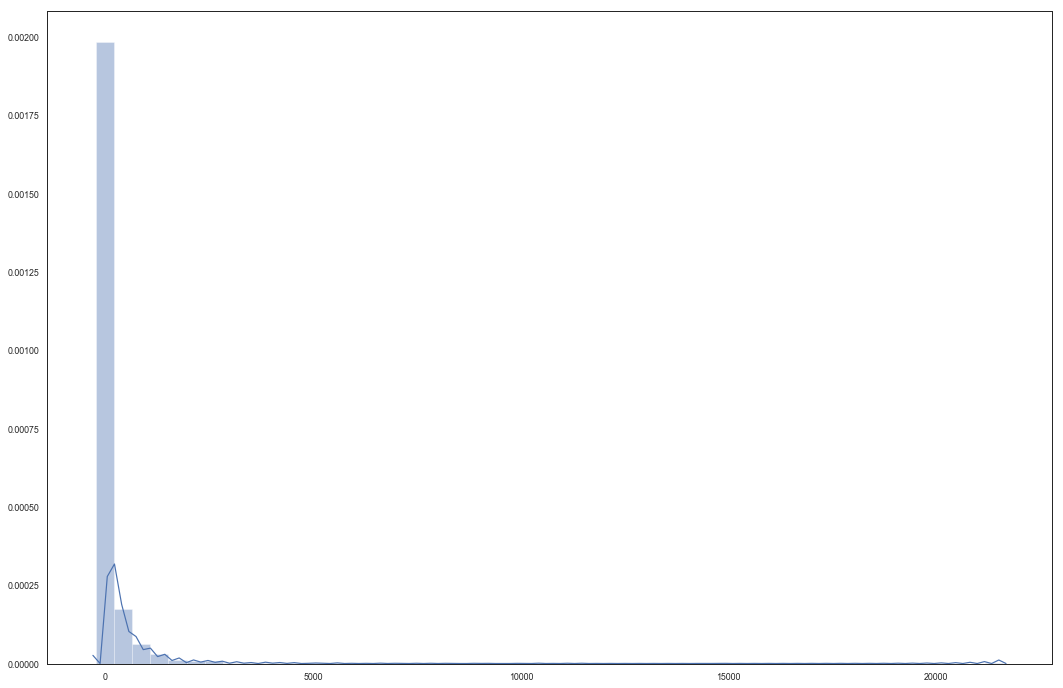

In [24]:
plot_emb(pca_data)

#### Clustering


N.B. Don't do clustering on reduced data, to avoid data leakage, and to sponsor myself you can use https://github.com/NoFishLikeIan/python_ian_utils

In [31]:
clusterer = ackeras.clustering.Clustering(data, cat_f)

-- Flag --: the column Sales does not seem to be normalized
-- Flag --: the column Quantity does not seem to be normalized
-- Flag --: the column Profit does not seem to be normalized
-- Flag --: the column Latitude does not seem to be normalized
-- Flag --: the column Longitude does not seem to be normalized


/anaconda3/lib/python3.6/site-packages/ackeras/clustering.py:26: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  data[categorical_features].dtypes, np.int) else [data.columns.get_loc(c) for c in data.columns if c in categorical_features]


In [32]:
clustered_data = clusterer.fit_predict()

Using KMeans with PCA
Trying cluster 3
Got score: 0.8530450783676776
Trying cluster 4
Got score: 0.7731227082901232
Trying cluster 5
Got score: 0.7733153189946178
Trying cluster 6
Got score: 0.7151265154703027
Trying cluster 7
Got score: 0.6891225977151144
Trying cluster 8
Got score: 0.6897904267606922
Trying cluster 9
Got score: 0.6610621801270072
Trying cluster 10
Got score: 0.65428582237613
Trying cluster 11
Got score: 0.6667904306966683
Trying cluster 12
Got score: 0.6627854305797726
Trying cluster 13
Got score: 0.6437476858008605
Trying cluster 14
Got score: 0.6082104648196534
Trying cluster 15
Got score: 0.6399774173968401
Trying cluster 16
Got score: 0.5820284424109833
Trying cluster 17
Got score: 0.6423483028587041
Trying cluster 18
Got score: 0.5819490170003313
Trying cluster 19
Got score: 0.5790735783019663
The best cluster has silhoutte score of 0.8530450783676776 k=3


In [33]:
clustered_reductor = ackeras.dim_red.RedDimensionality(clustered_data, cat_f)

In [34]:
umap_clustered = clustered_reductor.umap()

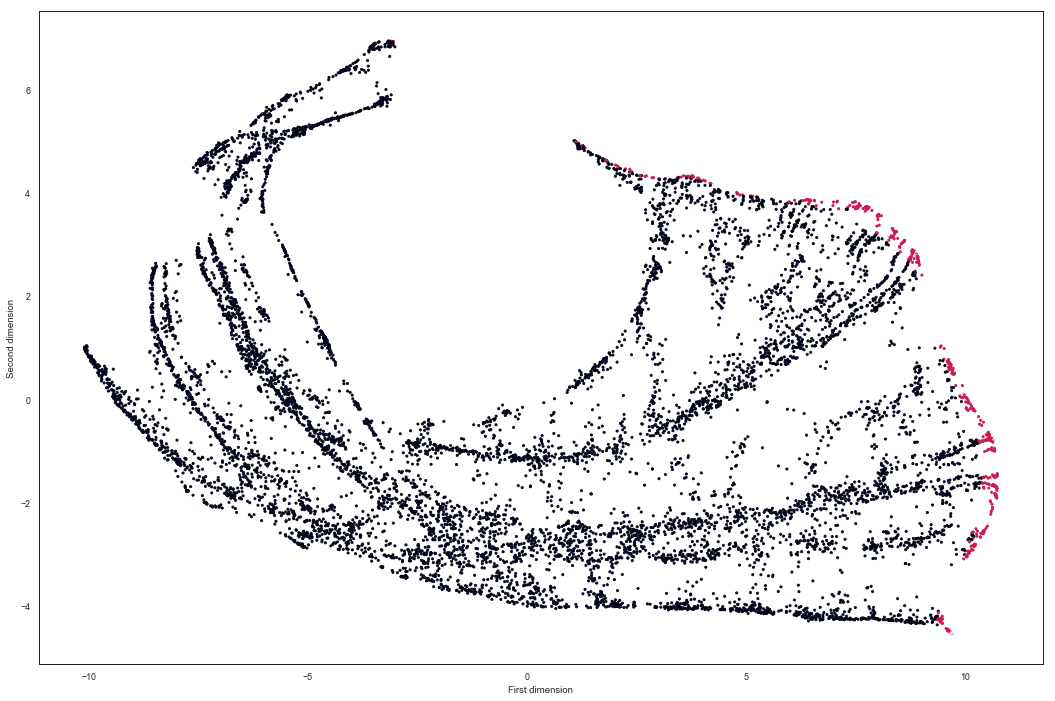

In [35]:
plot_emb(umap_clustered, labels = clustered_data.labels)

#### Regression

In [36]:
regressor_classification = ackeras.regression.Regression(data, 'Category')

The problem was set to: classification


In [37]:
regressor = ackeras.regression.Regression(data, 'Quantity')

The problem was set to: regression


In [38]:
opt_regressor, returning = regressor.fit_predict()

Did not find a reliable solution to the problem


In [39]:
opt_regressor, returning = regressor_classification.fit_predict()

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Score on test 0.6206344441108776


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   27.5s finished


#### Outlier detection

In [41]:
data.head()

,Sales,Quantity,Discount,Profit,Latitude,Longitude,Ship Mode,Category,"Country, France"
Order Date,,,,,,,,,
2016-01-02,1345.485,5.0,0.7,-1031.5385,41.893320,12.482932,3.0,1,0.0
2016-01-02,11.784,3.0,0.2,3.9771,40.835934,14.248783,3.0,1,0.0
2016-01-02,43.960,2.0,0.0,20.6612,41.893320,12.482932,0.0,1,0.0
2016-01-02,32.232,3.0,0.2,2.4174,38.111227,13.352443,3.0,1,0.0
2016-01-02,3.136,2.0,0.8,-4.7040,43.769871,11.255576,3.0,1,0.0


In [44]:
detector = ackeras.outlier_detection.OutlierDetection(data.reset_index(), contamination=0.005, timecolumn='Order Date')

/anaconda3/lib/python3.6/site-packages/ackeras/outlier_detection.py:106: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  y_column = original_data.describe().std().argmax()


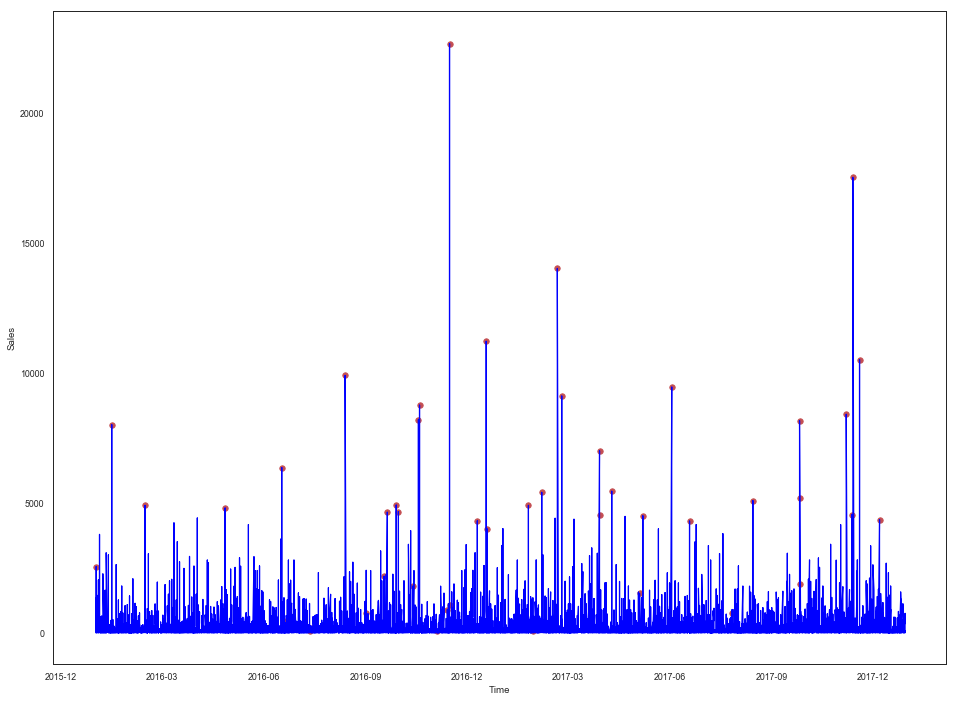

CPU times: user 1.21 s, sys: 104 ms, total: 1.31 s
Wall time: 1.3 s


In [45]:
%%time
outlier_data = detector.fit_predict(plot = True)

In [47]:
outlier_data.head()

,First_pc,Second_pc,outliers
0,884.588011,1259.418888,False
1,-218.656308,-18.825016,False
2,-183.822070,-28.835083,False
3,-198.917746,-13.262188,False
4,-228.847157,-12.020395,False
